In [1]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))

print(predicted)


[0]


In [2]:
predicted = logr.predict(numpy.array([4.6]).reshape(-1,1))

print(predicted)

[1]


Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.3596
Time:                        23:35:21   Log-Likelihood:                -4.3101
converged:                       True   LL-Null:                       -6.7301
Covariance Type:            nonrobust   LLR p-value:                   0.02781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0200      3.046     -1.648      0.099     -10.991       0.951
x1             0.6622      0.

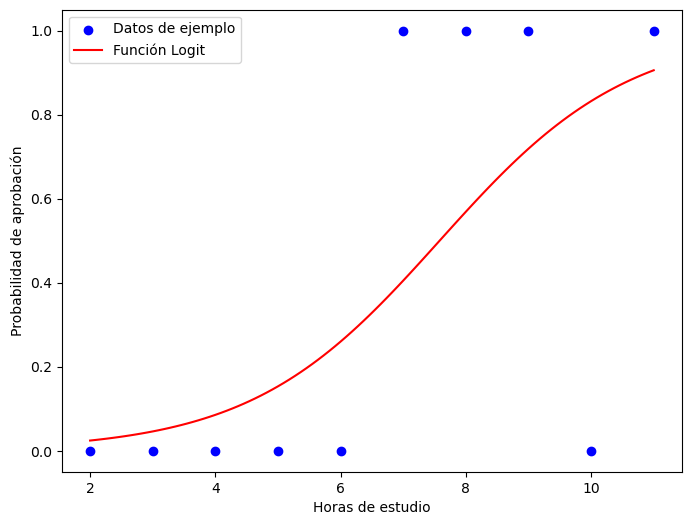

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Datos de ejemplo con algo de ruido
horas_estudio = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
aprobado = [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]  # Modificamos la última observación

# Agregar una constante al conjunto de datos (intercepto)
horas_estudio = sm.add_constant(horas_estudio)

# Crear el modelo de regresión logística
modelo = sm.Logit(aprobado, horas_estudio)

# Ajustar el modelo
resultado = modelo.fit()

# Mostrar los resultados del análisis
print(resultado.summary())

# Crear un conjunto de datos para graficar la función logit
X = np.linspace(2, 11, 100)
Y = resultado.predict(sm.add_constant(X))

# Graficar la función logit y la línea de regresión
plt.figure(figsize=(8, 6))
plt.scatter(horas_estudio[:, 1], aprobado, label='Datos de ejemplo', color='b')
plt.plot(X, Y, label='Función Logit', color='r')
plt.xlabel('Horas de estudio')
plt.ylabel('Probabilidad de aprobación')

plt.legend()
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear', random_state=0)

model.fit(x, y)

print(model.classes_)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))


[0 1]
[-1.04608067]
[[0.51491375]]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]
0.9
[[3 1]
 [0 6]]


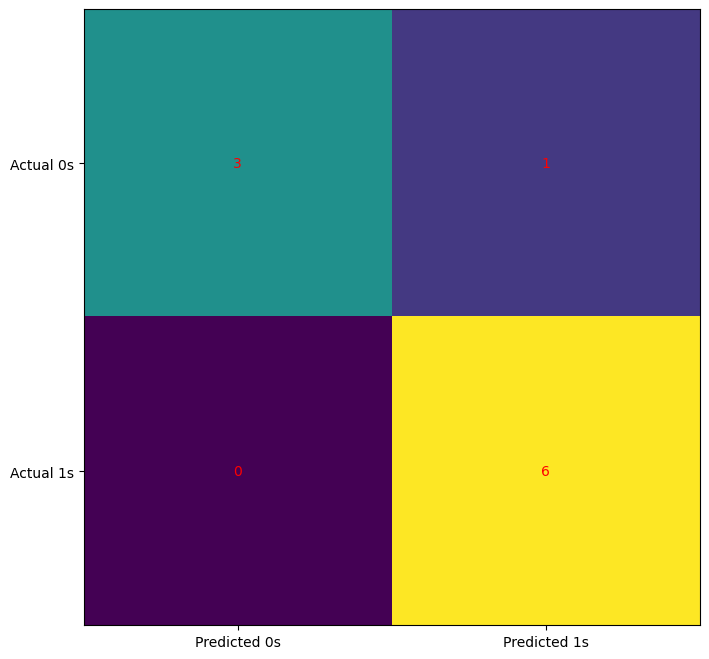

In [37]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [38]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [39]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
print(model.intercept_)
print(model.coef_)
print(model.predict_proba(x))
print(model.predict(x))
print(model.score(x, y))
print(confusion_matrix(y, model.predict(x)))

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]
1.0
[[4 0]
 [0 6]]


In [40]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [41]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [42]:
print('x:', x, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [43]:
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', p_pred, sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', score_, end='\n\n')
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')

y:
[0 1 0 0 1 1 1 1 1 1]

intercept: [-1.51632619]
coef: [[0.703457]]

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

y_pred: [0 0 0 1 1 1 1 1 1 1]

score_: 0.8

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [44]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

print(x)
print(y)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[0 1 0 0 1 1 1 1 1 1]


In [45]:
model = sm.Logit(y, x)
result = model.fit(method='newton')
print(result.params)
print(result.predict(x))
print((result.predict(x) >= 0.5).astype(int))
print(result.pred_table())

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7
[-1.972805    0.82240094]
[0.12208792 0.24041529 0.41872657 0.62114189 0.78864861 0.89465521
 0.95080891 0.97777369 0.99011108 0.99563083]
[0 0 0 1 1 1 1 1 1 1]
[[2. 1.]
 [1. 6.]]


In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 24 Oct 2023   Pseudo R-squ.:                  0.4263
Time:                        01:22:30   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [47]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2023-10-24 01:22 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

In [48]:
x, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x)
print(y)
print()
print()
print()
print()

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]






In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [50]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [51]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.964509394572025
0.9416666666666667


In [52]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

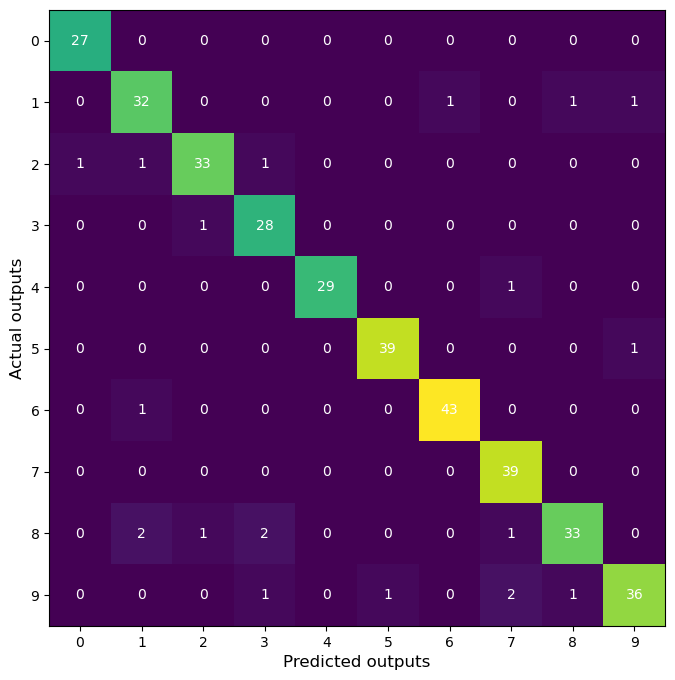

In [54]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

